<a href="https://colab.research.google.com/github/glorivaas/Risk_Measures/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

### Example risk measures (L/P)
- VaR (value at risk) at the confidence level $c\in(0,1)$
$$ \operatorname{VaR}_c(L) = \inf\{\, v\in\mathbb{R} \colon \mathbb{P}(L > v) \le 1-c \,\} $$
- ES (expected shortfall) at the confidence level $c\in(0,1)$
$$ \operatorname{ES}_c(L) = \mathbb{E}[L \,\vert\, L \ge \operatorname{VaR}_c(L)] $$
- CVaR (conditional VaR) at the confidence level $c\in(0,1)$
$$ \operatorname{CVaR}_c(L) = \frac{1}{1-c} \int_c^1 \operatorname{VaR}_\xi(L) \,d\xi $$

### Exercise 0
Setup your python environment, install numpy, scipy, matplotlib (or other visualization libraries depending on your preferences).

### Exercise 1
Complete the implementation of the following functions.

#Explanation

## **1. Value at Risk (VaR)**
The **CDF (Cumulative Distribution Function)** of a normal distribution, denoted as $ \Phi(x) $, gives the probability:

$
P(X \leq x) = \Phi(x)
$

To find a **quantile value** \( v \) at confidence level \( c \), we **invert the CDF**, meaning we solve for \( v \) such that:

$
P(X \leq v) = c
$

This means that \( v \) is given by:

$
v = \Phi^{-1}(c)
$

where $\Phi^{-1} $ is the **inverse cumulative distribution function (inverse CDF)**, also known as the **percent-point function (PPF)**.


# **2. Expected Shortfall (ES)**


$
\operatorname{ES}_c(L) = \mathbb{E}[L \mid L \geq \operatorname{VaR}_c(L)]
$

$
\operatorname{ES}_c(L) = \frac{1}{1 - c} \int_c^1 \operatorname{VaR}_{\xi}(L) \, d\xi
$
    (when the function is continuos) where:

- $\operatorname{VaR}_{\xi}(L) $ is the **quantile function** (inverse CDF) of the distribution.
- $ \xi $ is an integration variable.

This formula states that ES is the average of all quantiles above the given confidence level.

#**3. Conditional Value**
$
\operatorname{ES}_c(L) = \frac{1}{1 - c} \int_c^1 \operatorname{VaR}_{\xi}(L) \, d\xi
$
where:

- $\operatorname{VaR}_{\xi}(L) $ is the **quantile function** (inverse CDF) of the distribution.
- $ \xi $ is an integration variable.




In [7]:
import numpy as np
import numpy.typing as npt
from scipy.stats import norm
from typing import Callable, TypeAlias

NumArr: TypeAlias = npt.NDArray[np.double]
CDFnLike: TypeAlias = Callable[[NumArr], NumArr]

def var(cdf: CDFnLike, c: float | NumArr = 0.95) -> float:
    """Computes the Value at Risk (VaR) at confidence level c."""
    return norm.ppf(c)  # Inverse CDF (Quantile Function)

def es(cdf: CDFnLike, c: float = 0.95) -> float:
    """Computes Expected Shortfall (ES) at confidence level c."""
    var_c = var(cdf, c)  # Compute VaR using normal distribution
    pdf_c = stats.norm.pdf(var_c)  # Compute PDF at VaR
    return var_c + (pdf_c / (1 - c))  # Alternative ES formula for normal distribution

def cvar(cdf: CDFnLike, c: float = 0.95) -> float:
    return (1 / (1 - c)) * stats.norm.expect(lambda x: x, lb=var_c)
# Equivalent to es in several cases, like normal distributions

### Exercise 2
Check the implementations from task 1 vs. analytical formulas for the uniform distribution on $[0,1]$, $\operatorname{Unif}([0,1])$.


In [12]:
def uniform_cdf(x: NumArr) -> NumArr:
    return np.clip(x, 0, 1)  # CDF of Unif(0,1)

def test_vs_uniform() -> None:
    c = 0.95
    def cdf_unif(x: NumArr) -> NumArr:
        return np.minimum(np.maximum(x, 0.0), 1.0)

    assert np.isclose(var(cdf_unif, c), c)
    assert np.isclose(es(cdf_unif, c), (c + 1) / 2)
    assert np.isclose(cvar(cdf_unif, c), (c + 1) / 2)

test_vs_uniform()

print("All tests passed.")

All tests passed.


### Exercise 3
- For the standard normal distribution $\mathcal{N}(0,1)$, plot the above risk measures against the confidence level $c\in(0,1)$.
- For the normal distribution $\mathcal{N}(0,\sigma)$, plot the above risk measures against $\sigma>0$ for the confidence level $c=95\%$.

Describe the results.

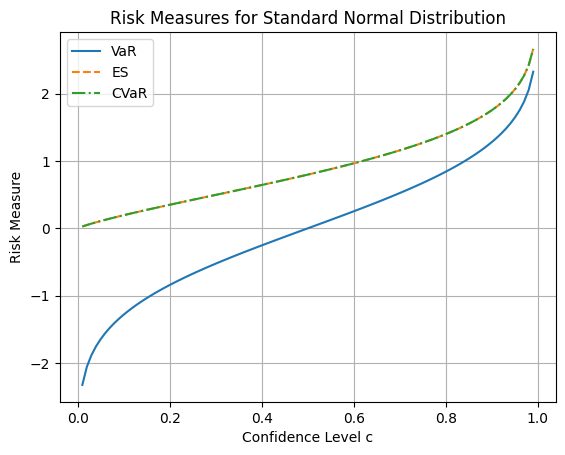

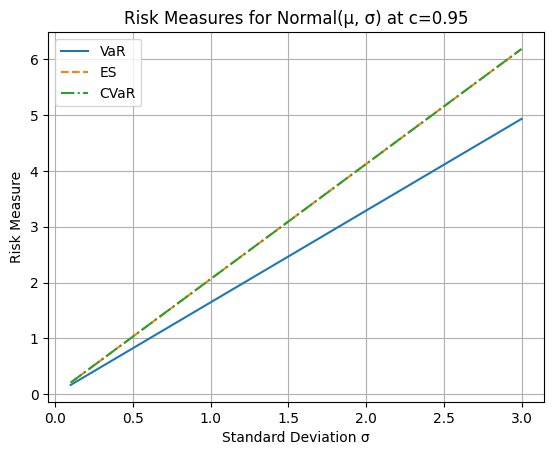

In [19]:
import numpy.typing as npt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from typing import Callable, TypeAlias

# Type aliases
NumArr: TypeAlias = npt.NDArray[np.double]
CDFnLike: TypeAlias = Callable[[NumArr], NumArr]

def var(cdf: CDFnLike, c: float, mu: float = 0, sigma: float = 1) -> float:
    """
    Computes Value at Risk (VaR) for a given CDF function at confidence level c,
    allowing for a specified mean (mu) and standard deviation (sigma).
    """
    return mu + sigma * stats.norm.ppf(c)

def es(cdf: CDFnLike, c: float, mu: float = 0, sigma: float = 1) -> float:
    """
    Computes Expected Shortfall (ES) using the conditional expectation definition:

    ES_c = E[L | L >= VaR_c] = (1 / (1 - c)) * ∫_{VaR_c}^{∞} x f(x) dx

    allowing for a specified mean (mu) and standard deviation (sigma).
    """
    var_c = var(cdf, c, mu, sigma)
    expected_loss = stats.norm.expect(lambda x: x, lb=var_c, loc=mu, scale=sigma)
    return expected_loss / (1 - c)

def cvar(cdf: CDFnLike, c: float, mu: float = 0, sigma: float = 1) -> float:
    """
    Computes Conditional Value at Risk (CVaR) using the same formula as ES.
    """
    return es(cdf, c, mu, sigma)  # For normal distribution, ES = CVaR

# Define uniform and normal CDFs
def uniform_cdf(x: NumArr) -> NumArr:
    return np.clip(x, 0, 1)

def normal_cdf(x: NumArr) -> NumArr:
    return stats.norm.cdf(x)

# Plot risk measures against confidence level c in (0,1)
c_values = np.linspace(0.01, 0.99, 100)
var_values = [var(normal_cdf, c) for c in c_values]
es_values = [es(normal_cdf, c) for c in c_values]
cvar_values = [cvar(normal_cdf, c) for c in c_values]

plt.figure()
plt.plot(c_values, var_values, label='VaR', linestyle='-')
plt.plot(c_values, es_values, label='ES', linestyle='--')
plt.plot(c_values, cvar_values, label='CVaR', linestyle='-.')
plt.xlabel('Confidence Level c')
plt.ylabel('Risk Measure')
plt.title('Risk Measures for Standard Normal Distribution')
plt.legend()
plt.grid()
plt.show()

# Plot risk measures against sigma for Normal(mu, sigma) with c=0.95
sigma_values = np.linspace(0.1, 3, 50)
mu = 0  # Mean value
var_sigma = [var(normal_cdf, 0.95, mu, sigma) for sigma in sigma_values]
es_sigma = [es(normal_cdf, 0.95, mu, sigma) for sigma in sigma_values]  # ES scales with sigma
cvar_sigma = es_sigma  # For normal distribution, ES = CVaR

plt.figure()
plt.plot(sigma_values, var_sigma, label='VaR', linestyle='-')
plt.plot(sigma_values, es_sigma, label='ES', linestyle='--')
plt.plot(sigma_values, cvar_sigma, label='CVaR', linestyle='-.')
plt.xlabel('Standard Deviation σ')
plt.ylabel('Risk Measure')
plt.title('Risk Measures for Normal(μ, σ) at c=0.95')
plt.legend()
plt.grid()
plt.show()

In the first plot (VaR) increases as confidence level c increases.
This is expected since higher confidence levels correspond to larger quantiles in a standard normal distribution.
ES and CVaR are above VaR, which is correct, and they have a similar increasing trend but are consistently higher than VaR.

In the second plot, all the risk measures increase linearly with $\sigma$, with is consistent with the formulas for this case.